# Movies Dataset

Dataset source: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney  
Note: a copy of this dataset is already included in `input_data/movies.csv`

## Step 1 General EDA  
* Note: I started by looking through some of the data and noticed the first attribute was not named so I named it *Number*
1. How many movies does each streaming service (Netflix, Hulu, Prime, Disney+) host? Who hosts the most movies?  
    * Netflix: 3560 movies hosted
    * Hulu: 903 movies hosted
    * Prime `Most`: 12354 movies hosted
    * Disney+: 564 movies hosted  

    Only the function `pie_chart_data_prep(table, cols_to_plot)` from *utils.py* was used to make this calculation since it computes each attributes total occurances.
1. Of the total occurrences of hosted movies (note a movie can be hosted on multiple services), what percent does each streaming service host?  
    * Netflix: 20.5% of total movies hosted
    * Hulu: 5.2% of total movies hosted
    * Prime `Most`: 71.1% of total movies hosted
    * Disney+: 3.2% of total movies hosted  

    After answering **Q1** we had computed what we needed to plot a Pie Chart using `def pie_chart(x_names, y, title)` from **plot_utils.py** which gives us each attributes percentage of the total occurances.
1. How does the distribution of IMDb ratings compare to the distribution of Rotten Tomatoes scores?  
    * IMDb Histogram: symmetric, unimodal
    * Rotten Tomatoes Histogram: Skewed Left  

    I had to create a new universal function in *utils.py* called `def stripper(column_list, symbol, factor)` which will remove the % signs from the Rotten Tomatoes data as well as convert it to the same float type (e.g. 7.8) as the IMDb ratings. Then both Histograms are plotted using functions already mentioned in *utils.py*.
1. Are IMDb ratings and Rotten Tomatoes scores in agreement? Meaning if one rates a movie low (or high), is it likely the other one did as well? What is the strength of this relationship?
    * Yes, the ratings are in agreement since they have a positive Coverance relation (1.7), meaning for each movie, both datasets are likely to move in the same direction. However the strength of this relationship is 0.66 which is not very close to 1. This means that for the same movie in IMDb and Rotten Tomates, the rating is seldom similar.

    This function was relatively easy as Q3 did some of the data prep. However the data prep functions for Scatter plots still needed to be called in order to plot the data.

Q1 Proof:  ['Netflix', 'Hulu', 'Prime Video', 'Disney+'] [3560.0, 903.0, 12354.0, 564.0]
Q2 Proof:


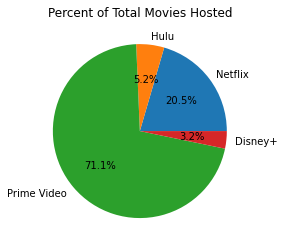

Q3 Proof:


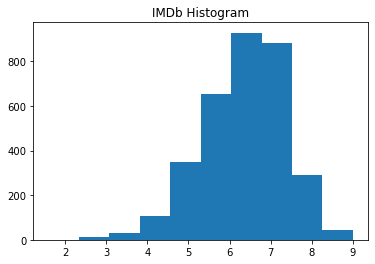

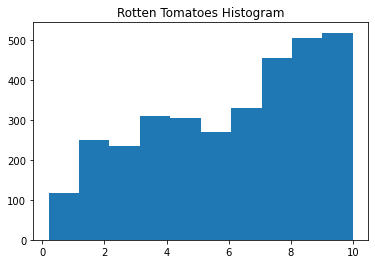

Q4 Proof: 


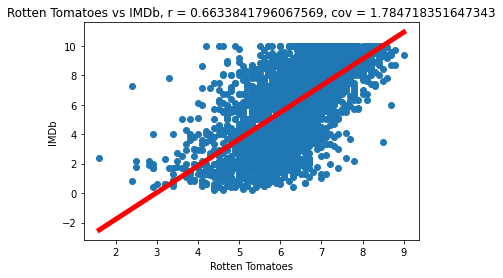

In [3]:
import utils
import plot_utils
import importlib
import mypytable 
import numpy as np
import os
import matplotlib.pyplot as plt

importlib.reload(utils)                 # reload utils
table = utils.table_set("movies.csv")  # populate table data

# 1
cols_to_plot = ["Netflix","Hulu","Prime Video","Disney+"]
totals_list = utils.pie_chart_data_prep(table, cols_to_plot)
print("Q1 Proof: ", cols_to_plot, totals_list)


# 2
print("Q2 Proof:")
plot_utils.pie_chart(cols_to_plot, totals_list, "Percent of Total Movies Hosted")

# 3
print("Q3 Proof:")
importlib.reload(mypytable) # reload
importlib.reload(plot_utils)

    # data prep 
mypytable.MyPyTable.remove_rows_with_missing_values(table)  # remove missing values

IMDb_column_list = mypytable.MyPyTable.get_column(table, "IMDb")    # store IMDb col
rt_column_list = mypytable.MyPyTable.get_column(table, "Rotten Tomatoes") # store 
new_rt_list = utils.stripper(rt_column_list, '%', 10) # remove percentes from data and covernt to like float value

plot_utils.histogram("IMDb", IMDb_column_list)
plot_utils.histogram("Rotten Tomatoes", new_rt_list)

# 4
print("Q4 Proof: ")

m, b, regression, covariance = utils.scatter_plot_data_prep(table, IMDb_column_list, new_rt_list)
plot_utils.scatter_with_linear_regr(IMDb_column_list, new_rt_list, m, b, regression, covariance, "IMDb", "Rotten Tomatoes")


## Step 2 Categorical/Continuous Relationships
1. How do the distributions of IMDb ratings for each genre compare to the distributions of Rotten Tomatoes scores for each genre?  
    * For starters, the distributions of Rotten Tomatoes Ratings Interquartile ranges area about 4 where in IMDb they are around 1. This means there is more variance in ratings in Rotten Tomatoes. 
    *  The distributions themselves still tend to go up and down together as we showed in the scatter plot above. 
    * The mins in Rotten Tomatoes distributions are also often much lower than the min in IMDb distributions. However, the IMDb distributions have much more outliers
    * The medians are hard to read, but they seem to be relatively similar in both distributions.
1. Is there a particular genre that IMDb and/or Rotten Tomatoes seems to rate consistently high (or low)? 
    * In both distributions, News is consistently rated the highest and Horror is consistently rated the lowest.

* I developed 2 new functions to acheive the desired result here (which were a bit challenging). The first of which is the `ef multi_boxplot_data_prep(table, list1, list2, column)` in *utils.py*. This function basically prepares all the data to be used to plot the box and whisker plots. To put it simply, it seperates values with commas, creates lists of ratings for each genre, and makes a strig of code that is excecuted in *plot_utils.py* which is pretty cool!  
* The second function is `def multi_box_wisker(code, tick_names, amt, all_genres1, all_genres2, title)` in *plot_utils.py* which is relatively simple just plotting box and whisker data after the calculations in `multi_boxplot_data_prep()`.




24
24


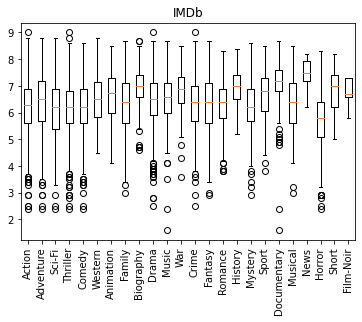

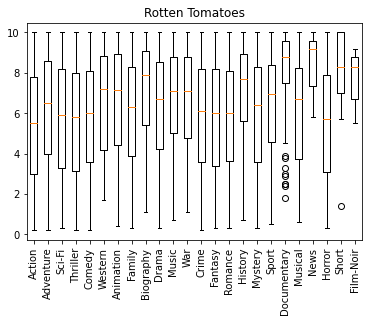

In [46]:
import utils
import plot_utils
import importlib
import mypytable 
import numpy as np
import os
import matplotlib.pyplot as plt

importlib.reload(utils)
importlib.reload(plot_utils)
IMDb_plot_code, rt_plot_code, all_genres1, all_genres2, x_names = utils.multi_boxplot_data_prep(table, IMDb_column_list, new_rt_list, "Genres")

plot_utils.multi_box_wisker(IMDb_plot_code, x_names, plot_len, all_genres1, all_genres2, "IMDb")
plot_utils.multi_box_wisker(rt_plot_code, x_names, plot_len, all_genres1, all_genres2, "Rotten Tomatoes")

  


### Total Time Spent on PA: 12 hrs..